In [2]:
%matplotlib notebook
import numpy as np
import cmath 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

<IPython.core.display.Javascript object>


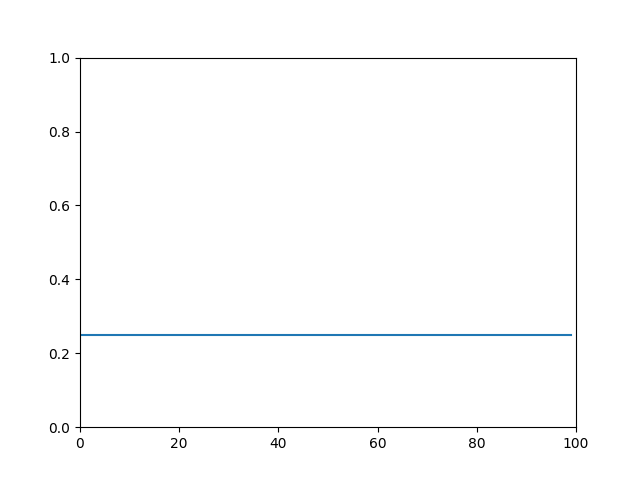

interactive(children=(FloatSlider(value=1.0, description='Field Strength', max=5.0), FloatSlider(value=1.0, de…

In [3]:
# Input of the Coefficients of the Initial State
#a = complex(input("a="))
#b = complex(input("b="))

# Dummy Plot Initialization
x = np.linspace(0, 100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
# ax.plot(...) has multiple outputs, we only want the first one hence , after line
line, = ax.plot(x, np.ones(x.shape))

def update(B, a, b):
    a = complex(a)
    b = complex(b)
    hb = (6.626e-34)/(2*np.pi)        
    i = complex(0,1) 
    C = 1/(abs(a)+abs(b))

    #Basis State vecters
    up = np.array([1,0])
    down = np.array([0,1])

    #Define Sx operator 
    S_x = (hb/2)*np.array([[0,1],[1,0]])

    #Spin up and down along the x-axis 
    up_x = (1/np.sqrt(2))*np.array([1,1])
    down_x = (1/np.sqrt(2))*np.array([1,-1])

    #Time evolved State Vecter
    Prob = []
    tp = []
    for t in range(0,100):
        E = np.array([np.exp(-i*B*t/2),np.exp(i*B*t/2)])
        psi_t = (C/np.sqrt(2))*((a+b)*E[0]*up_x + (a-b)*E[1]*down_x)
        p_up = (abs(np.dot(np.conj(up),psi_t)))**2
        Prob.append(p_up)
        tp.append(t)
    line.set_xdata(tp)
    line.set_ydata(Prob)
    #two types of interaction 1.blocking 2.nonblocking
    #draw and canavas are blocking types to have it calc, display and further operate on it 
    #...we add idle() particular to fig and canvas and this version of lib 
    fig.canvas.draw_idle()

widgets.interact(update, B=widgets.FloatSlider(min=0, max=5, value=1, description='Field Strength'),
                         a=widgets.FloatSlider(min=0, max=10, value=1),
                         b=widgets.FloatSlider(min=0, max=10, value=1));